### Plotting snap shot of model surface speed

In [28]:
import numpy as np
import sys
sys.path.append("../src/")

import matplotlib.pyplot as plt 
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

import seawater as sw

In [29]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [30]:
lw1=4
aph=.7
sc = 20.

In [31]:
import dp_map
dpmap = dp_map.drake_passage_map(fig_label="b",fig_title="llc 4320 simulation")
m = dpmap.m

In [38]:
data_path = 'uv_0m_single_file.nc'
data = Dataset(data_path)

auxt = np.load('/Users/crocha/Dropbox/research/mitgcm/drake/subsets/eta_919_1440.npz')

In [33]:
flat = (data.variables['lat'][:] > -62) & (data.variables['lat'][:] < -55)
lon,lat = np.meshgrid(data.variables['lon'],data.variables['lat'][:][flat])
lon,lat = m(lon,lat)

In [42]:
time = auxt['time']

Topography

In [34]:
topo = np.load("../topo/topo_dp.npz")
lont,latt,zt = topo['lon'],topo['lat'],topo['topo']

In [35]:
dec = 2
lont = lont[::dec]
latt = latt[::dec]
zt = zt[::dec,::dec]
lonti,latti = np.meshgrid(lont,latt)
xgt,ygt = m(lonti,latti)

In [36]:
it = 7  # choose an arbitrary snapshot
speed = np.sqrt((data.variables['u'][flat,:,it]**2 +\
                 data.variables['v'][flat,:,it]**2))
speed = np.ma.masked_array(speed,speed>1.26)

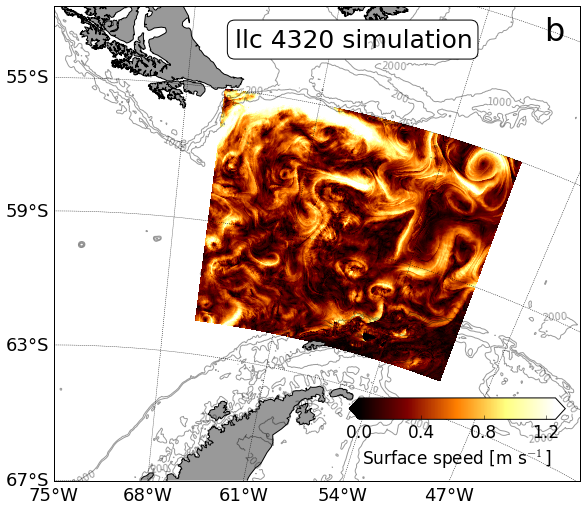

In [37]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')

pc = m.pcolor(lon,lat,speed,cmap='afmhot',vmin=0,vmax=1.26)

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()
dpmap.set_label(pos=(1650212,1475371))
dpmap.set_title(pos=(1000212,1475371))

        
axColor = plt.axes([.55,.225,.25,.035])
cb = plt.colorbar(pc, cax = axColor, orientation="horizontal",
                  extend='both')

cb.set_label(u'Surface speed [m s$^{-1}$]',fontsize=17)
cb.set_ticks(np.arange(0,1.6,.4))
cb.ax.tick_params(labelsize=17) 


plt.savefig('figs/model_snapshot_speed',dpi=300,bbox_inches='tight')

# compute vorticity

In [13]:
u, v = data.variables['u'][flat,:,it], data.variables['v'][flat,:,it]

In [14]:
flat = (data.variables['lat'][:] > -62) & (data.variables['lat'][:] < -55)
loni,lati = np.meshgrid(data.variables['lon'],data.variables['lat'][:][flat])
ix,jx = loni.shape
DX = np.empty((ix-1,jx))
DY = np.empty((ix,jx-1))

In [15]:
for i in range(ix):
    DY[i,:],_ = sw.dist(lati[i,:],loni[i,:])
for j in range(jx):
    DX[:,j],_ = sw.dist(lati[:,j],loni[:,j])

In [16]:
dx, dy = DX.mean(), DY.mean()

In [17]:
ux,uy = np.gradient(u,dx,dy)
vx,vy = np.gradient(v,dx,dy)

In [18]:
zeta = vy - ux

In [19]:
f = np.abs(sw.f(lati))
zeta = zeta/1.e3/f

NameError: name 'zeta' is not defined

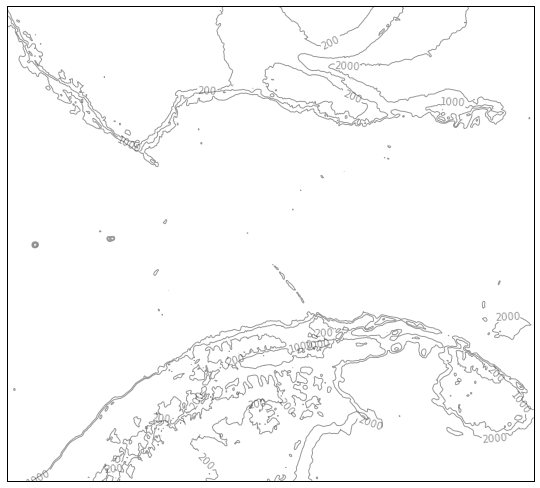

In [27]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')

dec = 5
pc = m.pcolor(lon[::dec],lat[::dec],zeta[::dec],cmap='coolwarm',vmin=-.5,vmax=.5)

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()
dpmap.set_label(pos=(1650212,1475371))
dpmap.set_title(pos=(1000212,1475371))


axColor = plt.axes([.55,.225,.25,.035])
cb = plt.colorbar(pc, cax = axColor, orientation="horizontal",
                  extend='both')

cb.set_label(u'Surface vorticity $\zeta/|f|$',fontsize=17)
cb.set_ticks(np.arange(-5.,1.,.5))
cb.ax.tick_params(labelsize=17) 

plt.savefig('figs/model_snapshot_vorticity',dpi=300,bbox_inches='tight')
plt.savefig('figs/model_snapshot_vorticity.eps',dpi=10,bbox_inches='tight')
#plt.savefig('figs/model_snapshot_vorticity.pdf',format='pdf',dpi=300,bbox_inches='tight')



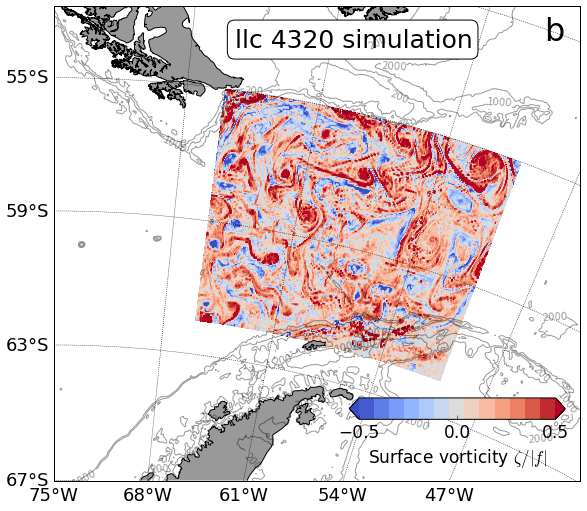

In [21]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')

dec = 5
czt = np.linspace(-0.5,.5,14)
pc = m.contourf(lon[::dec],lat[::dec],zeta[::dec],czt,vmin=-.5,vmax=.5,\
                cmap='coolwarm',extend='both')

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()
dpmap.set_label(pos=(1650212,1475371))
dpmap.set_title(pos=(1000212,1475371))


axColor = plt.axes([.55,.225,.25,.035])
cb = plt.colorbar(pc, cax = axColor, orientation="horizontal",
                  extend='both')

cb.set_label(u'Surface vorticity $\zeta/|f|$',fontsize=17)
cb.set_ticks(np.arange(-5.,1.,.5))
cb.ax.tick_params(labelsize=17) 

#plt.savefig('figs/model_snapshot_vorticity',dpi=300,bbox_inches='tight')
plt.savefig('figs/model_snapshot_vorticity.eps',dpi=50,bbox_inches='tight')
plt.savefig('figs/model_snapshot_vorticity.ps',dpi=50,bbox_inches='tight')
#plt.savefig('figs/model_snapshot_vorticity.pdf',format='pdf',dpi=300,bbox_inches='tight')




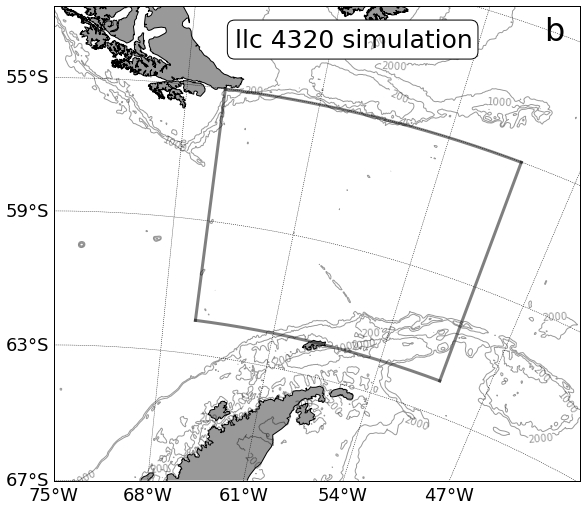

In [22]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

cs = m.contour(xgt,ygt,-zt,np.array([200,1000,2000]),colors='k',alpha=.4)
plt.clabel(cs,inline=1,fontsize=10,fmt='%i')


m.plot(lon[0,:],lat[0,:],'k',linewidth=3.,alpha=.5)
m.plot(lon[-1,:],lat[-1,:],'k',linewidth=3.,alpha=.5)
m.plot(lon[:,-1],lat[:,-1],'k',linewidth=3.,alpha=.5)
m.plot(lon[:,0],lat[:,0],'k',linewidth=3.,alpha=.5)



m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()
dpmap.set_label(pos=(1650212,1475371))
dpmap.set_title(pos=(1000212,1475371))

#plt.savefig('figs/model_snapshot_vorticity',dpi=300,bbox_inches='tight')
plt.savefig('figs/model_domain.eps',bbox_inches='tight')
#plt.savefig('figs/model_snapshot_vorticity.ps',dpi=50,bbox_inches='tight')
#plt.savefig('figs/model_snapshot_vorticity.pdf',format='pdf',dpi=300,bbox_inches='tight')



In [23]:
np.savez('lon_lat_model.npz',lon=lon,lat=lat)